## Aluno: Fernando Gomes Papi

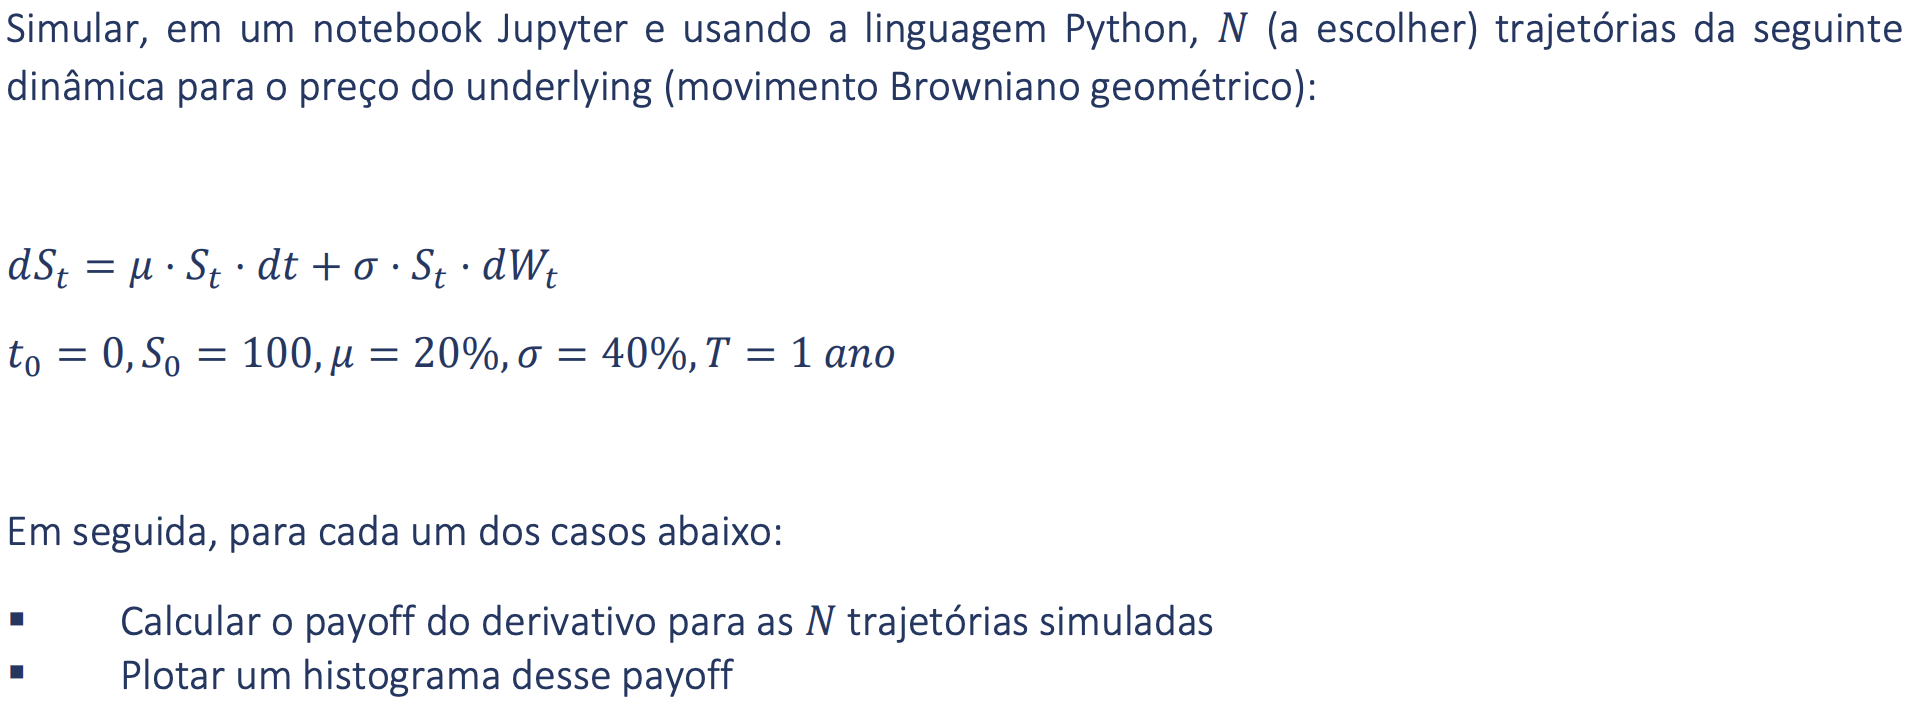

In [1]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Parameters
mu = 0.2      # Expected drift or mean return
sigma = 0.4   # Volatility
S0 = 100      # Initial asset price
T = 1 # Total time in years
dt = 1/365    # Time step (daily)

In [3]:
def plot_histogram(payoffs, title):
    # Set the style for the plot (optional)
    plt.figure(figsize=(8,8))
    sns.set(style="whitegrid")
    
    # Create a beautiful histogram
    sns.histplot(payoffs, kde=True, color='blue', bins=50)
    max_h = max(np.histogram(payoffs, bins=50)[0])
    plt.plot([np.mean(payoffs),np.mean(payoffs)], [0, max_h], c='orangered', ls='--', lw=3, zorder=4)
    plt.annotate(f'E(x)={np.mean(payoffs ):.2f}\n', (np.mean(payoffs), max_h),
            textcoords="offset points",
            xytext=(10,0), ha='left', va='top',
            bbox=dict(boxstyle='round, pad=0.2',
            edgecolor='black', facecolor='wheat', alpha=1))
    # Add labels and a title (customize as needed)
    plt.xlabel("Payoff")
    plt.ylabel("Payoff Count")
    plt.title(title)
    
    # Show the plot
    plt.show()

In [4]:
from aleatory.processes import GBM

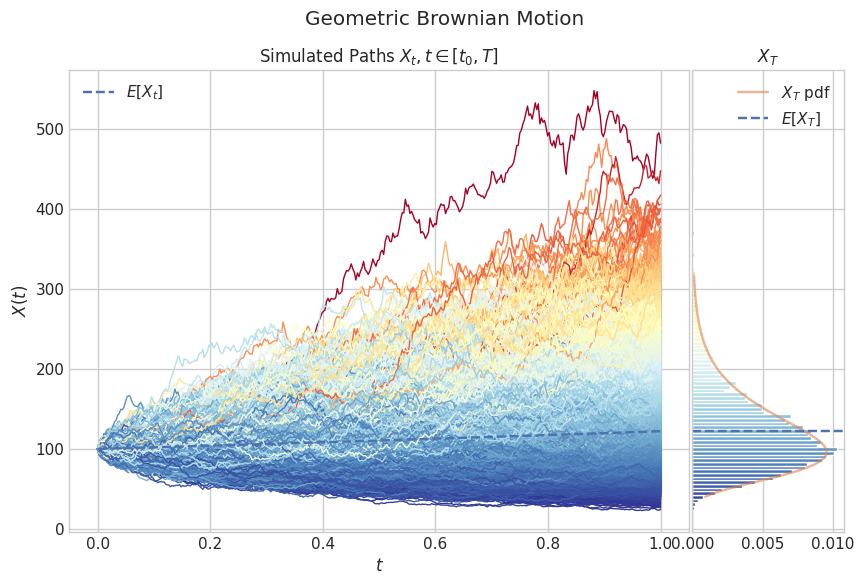

In [16]:
# Cria uma instância da classe GBM com os parâmetros especificados
gbm = GBM(drift=mu, volatility=sigma, initial=S0, T=T)

# Define as opções de formatação da figura (gráfico)
fig_kw = {'figsize': (10, 6)}

# Gera o gráfico usando a instância GBM
fig = gbm.draw(envelope=True, n=365, N=10000, **fig_kw)

In [17]:
# all paths as a dataframe where rows are t and columns are each price path
gbm_paths_df = pd.DataFrame(np.array(gbm.paths).T)
gbm_paths_df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,101.119452,99.746452,98.721924,101.115326,104.605436,103.409459,100.566682,98.858431,99.944716,104.348345,...,102.251503,98.339485,97.274542,97.068524,100.793100,99.803511,101.952786,105.090469,102.038808,100.183403
2,100.794384,99.914268,99.869137,100.999438,108.532504,102.064948,99.253108,97.600948,98.594258,109.418190,...,103.869292,97.736238,98.888022,93.962816,101.521212,99.514266,100.325172,101.624407,100.677266,102.253785
3,107.201072,98.721676,100.197873,98.234797,106.581218,102.502496,94.400481,96.851602,100.952858,112.537272,...,102.223656,98.092918,95.294191,91.602951,100.513512,99.655620,99.386310,99.888026,102.626134,103.279444
4,108.406132,100.781449,99.411738,94.319133,105.039479,103.200330,92.125738,95.331060,98.727473,112.180131,...,104.554572,98.754341,96.344561,93.923322,102.231353,98.087411,101.202624,100.624138,98.534651,102.730032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,241.002072,90.797549,119.659065,90.921142,82.813057,69.106861,96.683131,113.747402,153.877034,117.940815,...,154.008086,87.458151,49.647087,84.568269,112.158588,226.644329,66.516230,165.060878,175.091394,96.248998
361,245.180633,92.378000,118.624452,89.389023,86.107255,67.736393,98.326873,115.159093,154.815655,112.306410,...,151.585713,85.758897,49.037046,86.610219,114.528505,223.606623,64.736268,160.118199,175.468357,95.657453
362,255.896671,91.792642,117.646163,88.439982,86.889962,68.791822,96.033547,116.554071,151.977701,110.811588,...,156.862775,86.345014,49.321074,87.466399,113.466411,224.169248,63.920612,157.962001,179.622181,90.872373
363,262.621872,95.647674,116.217474,87.253466,86.597985,71.083868,96.842171,116.157797,151.290772,109.290623,...,158.101733,84.758329,48.387644,89.702147,112.630638,226.863366,63.934081,163.508932,180.533919,92.540950


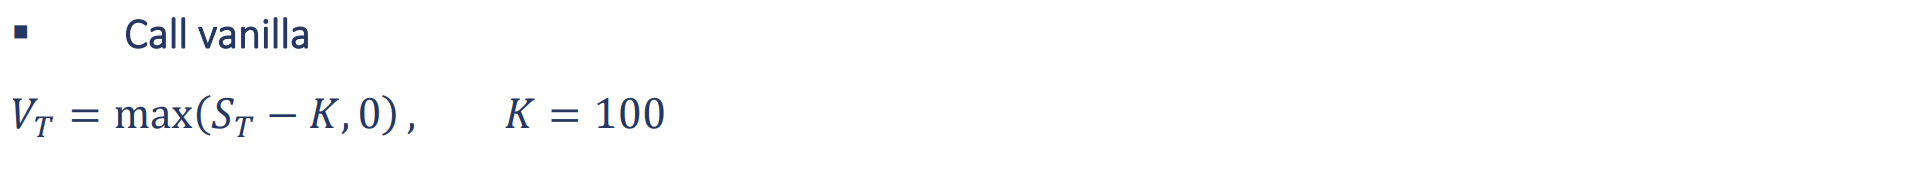

In [18]:
# Preço de exercício da opção
K = 100

# Função que calcula o payoff de uma opção de compra de estilo europeu
def payoff_call_vanilla(final_price, strike):
    # O payoff é a diferença entre o preço final do ativo subjacente e o preço de exercício,
    # mas é no mínimo zero.
    return max(final_price - strike, 0)

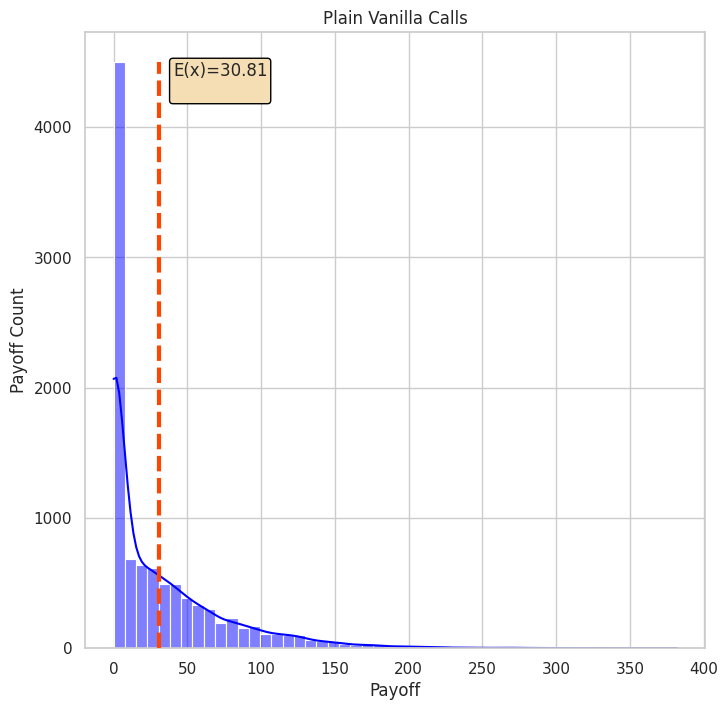

In [19]:
# Obtém o valor final de cada caminho de preço
final_values = gbm_paths_df.iloc[-1]

# Calcula os payoffs de todas as opções de compra de estilo europeu (vanilla call)
payoffs_vanilla = final_values.apply(lambda x: payoff_call_vanilla(x, K))

# Gera um histograma dos payoffs das opções de compra (Plain Vanilla Calls)
plot_histogram(payoffs_vanilla, 'Plain Vanilla Calls')

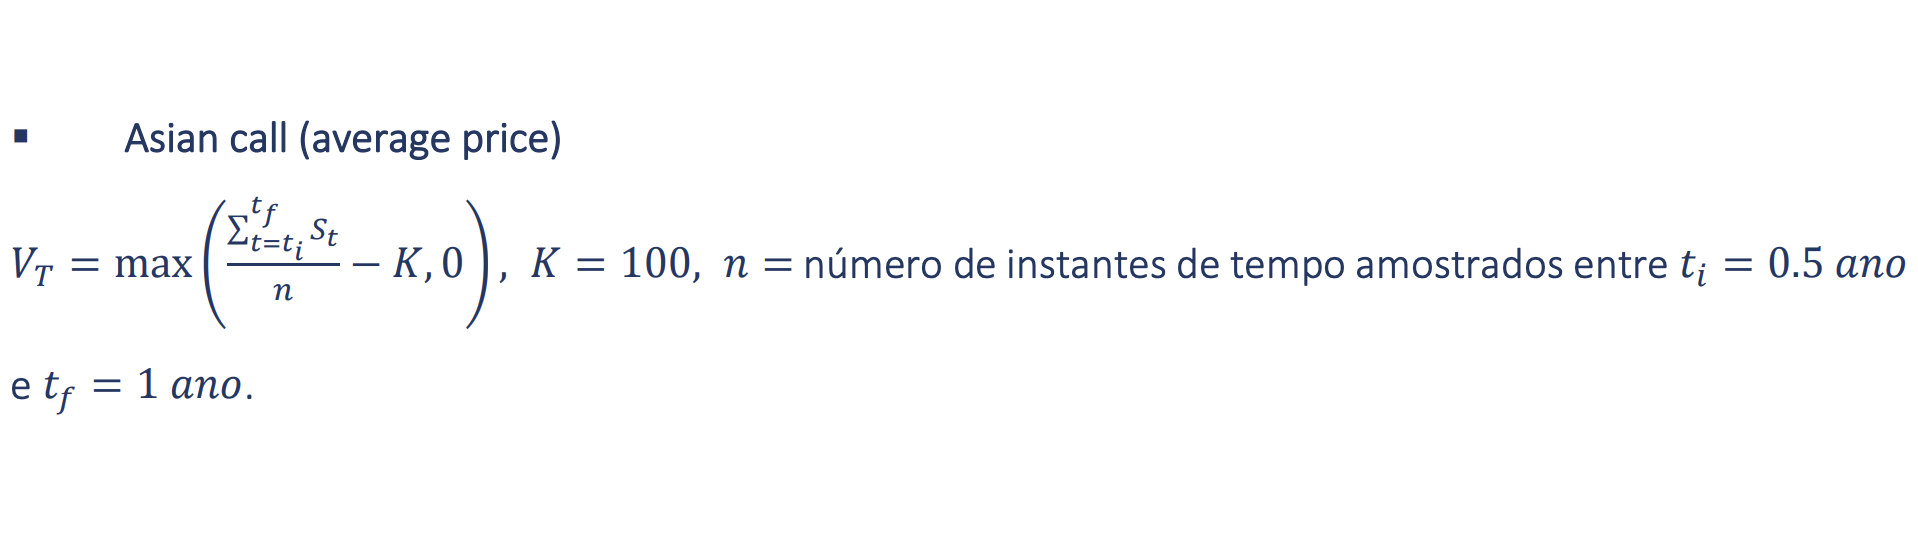

In [20]:
# Preço de exercício da opção
K = 100

def payoff_asian_call(prices, strike_price):
    # Calcula a média dos preços no caminho de preço
    avg_price = np.mean(prices)
    
    # Calcula o payoff da opção de compra de estilo asiático
    payoff = max(avg_price - strike_price, 0)
    
    # Retorna o payoff calculado
    return payoff

In [21]:
# Calcula o número de pontos no caminho de preço (n), onde n é igual a metade do tempo T
n = int(0.5 * len(gbm_paths_df))  # Número de pontos = metade do comprimento do DataFrame (364/2 pontos)

# Seleciona os últimos n valores do caminho de preço
price_values = gbm_paths_df.iloc[-n:]

# Exibe as últimas linhas dos valores de preço
price_values.tail()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
360,241.002072,90.797549,119.659065,90.921142,82.813057,69.106861,96.683131,113.747402,153.877034,117.940815,...,154.008086,87.458151,49.647087,84.568269,112.158588,226.644329,66.516230,165.060878,175.091394,96.248998
361,245.180633,92.378000,118.624452,89.389023,86.107255,67.736393,98.326873,115.159093,154.815655,112.306410,...,151.585713,85.758897,49.037046,86.610219,114.528505,223.606623,64.736268,160.118199,175.468357,95.657453
362,255.896671,91.792642,117.646163,88.439982,86.889962,68.791822,96.033547,116.554071,151.977701,110.811588,...,156.862775,86.345014,49.321074,87.466399,113.466411,224.169248,63.920612,157.962001,179.622181,90.872373
363,262.621872,95.647674,116.217474,87.253466,86.597985,71.083868,96.842171,116.157797,151.290772,109.290623,...,158.101733,84.758329,48.387644,89.702147,112.630638,226.863366,63.934081,163.508932,180.533919,92.540950
364,260.931867,95.002611,117.104086,87.231991,91.054276,71.623373,96.408085,121.668597,152.161873,108.436447,...,163.098008,85.119346,48.460585,89.246098,113.188935,229.591229,65.194901,162.958055,186.628702,92.460025


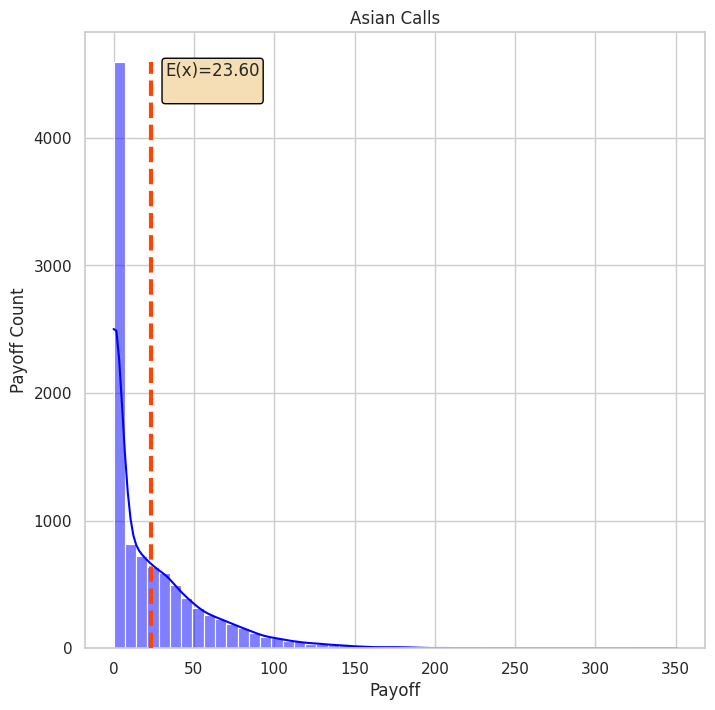

In [22]:
# Calcula os payoffs das opções de compra de estilo asiático
asian_payoffs = price_values.apply(lambda x: payoff_asian_call(x, K))

# Gera um histograma dos payoffs das opções de compra de estilo asiático (Asian Calls)
plot_histogram(asian_payoffs, 'Asian Calls')

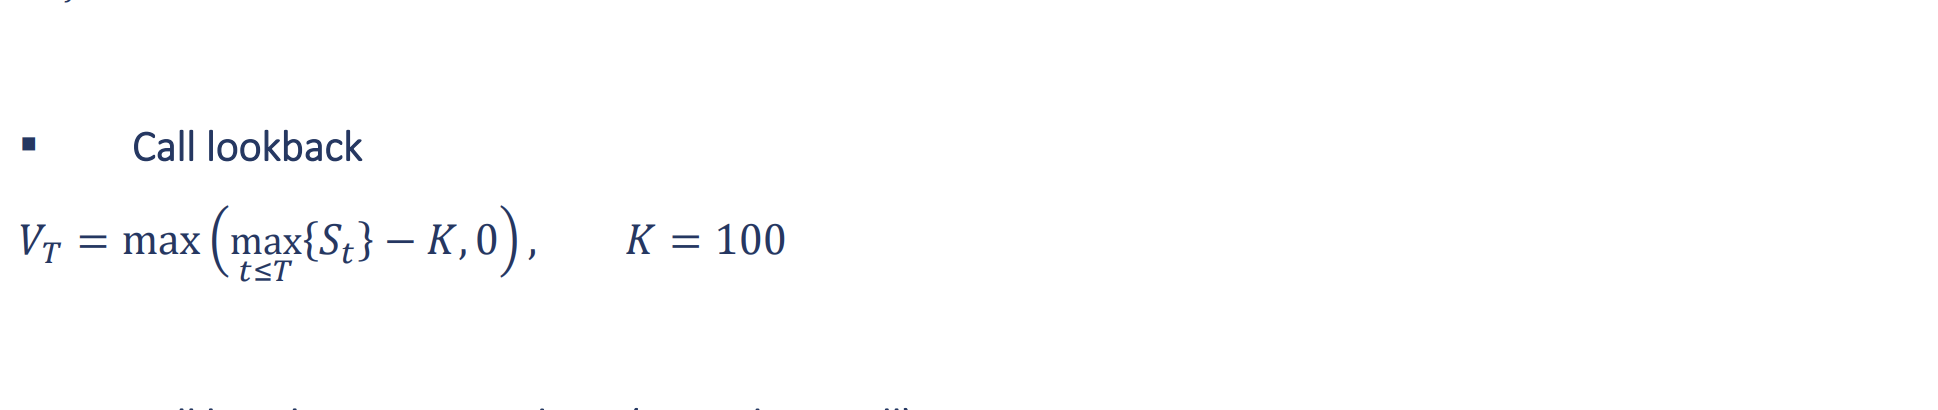

In [23]:
# Preço de exercício da opção
K = 100

def payoff_lookback_call(prices, strike_price):
    # Obtém o preço máximo no caminho de preço
    max_price = max(prices)
    
    # Calcula o payoff da opção de compra do tipo "lookback"
    payoff = max(max_price - strike_price, 0)
    
    # Retorna o payoff calculado
    return payoff

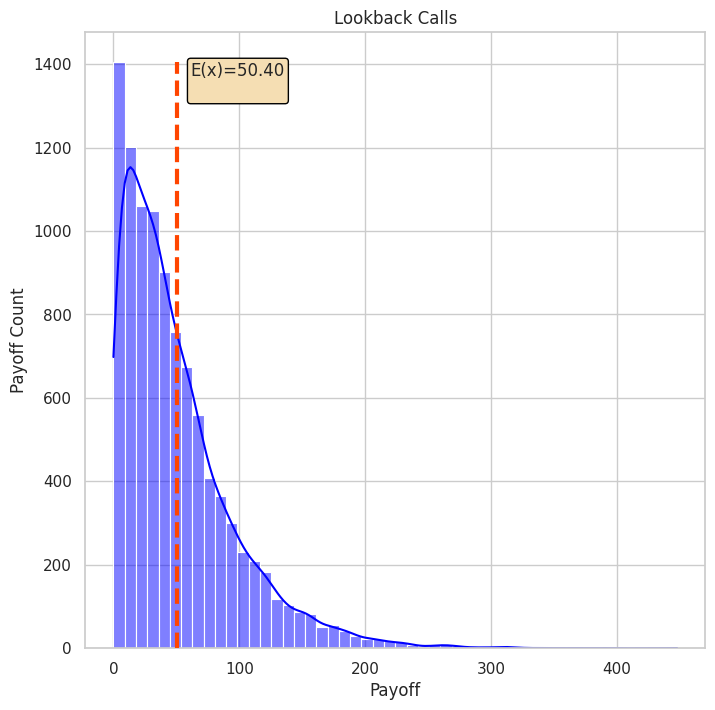

'Como o preço inicial é 100 e o preço de exercício (strike) também é 100, max(St) será sempre maior ou igual a 100,\ne o payoff será sempre maior ou igual a 0.'

In [24]:
# Seleciona todo o caminho de preço (excluindo a primeira linha)
price_values = gbm_paths_df[1:]

# Calcula os payoffs das opções de compra do tipo "lookback"
payoffs_lookback = price_values.apply(lambda x: payoff_lookback_call(x, K))

# Gera um histograma dos payoffs das opções de compra do tipo "lookback" (Lookback Calls)
plot_histogram(payoffs_lookback, 'Lookback Calls')

'''Como o preço inicial é 100 e o preço de exercício (strike) também é 100, max(St) será sempre maior ou igual a 100,
e o payoff será sempre maior ou igual a 0.'''

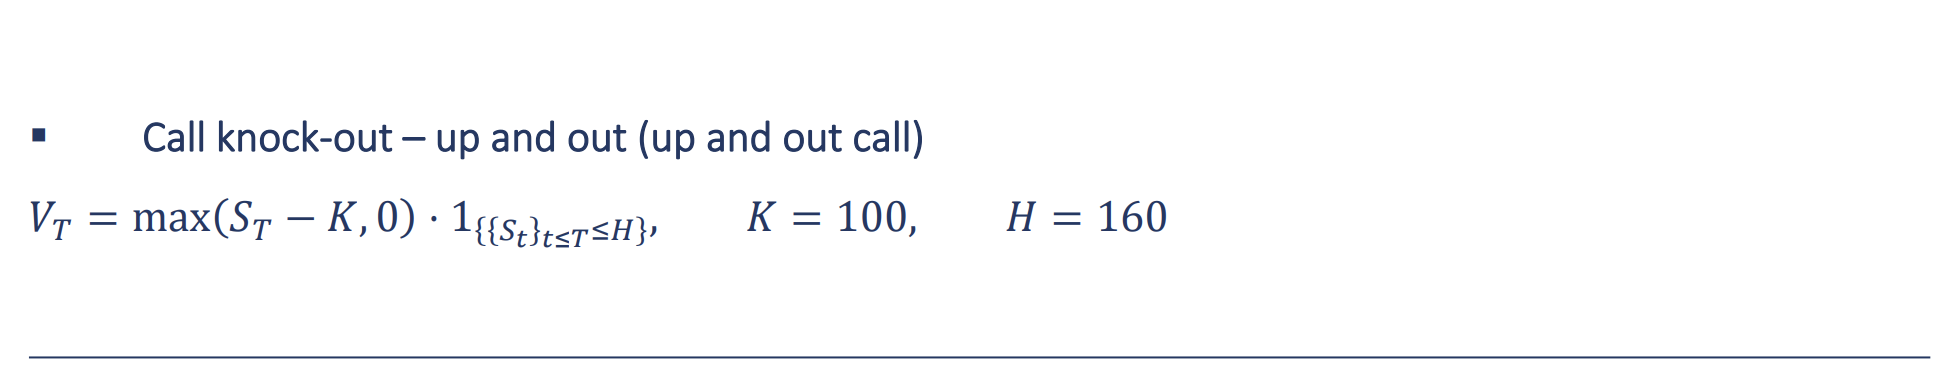

In [25]:
# Preço de exercício da opção
K = 100

# Preço da barreira superior
barrier = 160

def payoff_call_up_and_out(prices, strike_price, barrier):
    # Se em algum ponto do caminho atingirmos a barreira superior,
    # o payoff da opção é 0
    if any(prices > barrier):
        return 0

    # Caso contrário, o payoff é como o de uma opção de compra comum
    # Obtém o último preço do caminho
    final_value = prices.iloc[-1]
    return max(final_value - strike_price, 0)

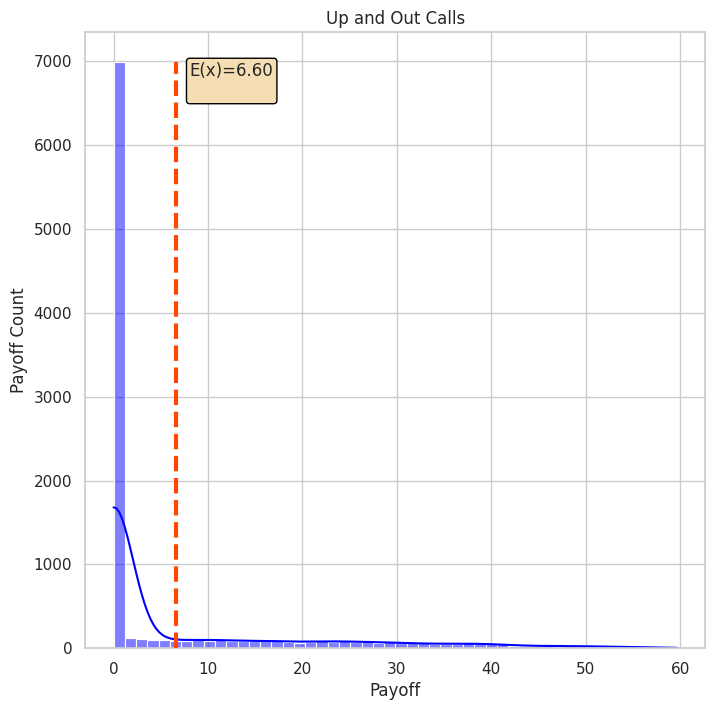

In [26]:
# Seleciona o caminho de preço a ser considerado
price_values = gbm_paths_df

# Calcula os payoffs das opções de compra "up-and-out"
payoffs_up_and_out = price_values.apply(lambda x: payoff_call_up_and_out(x, K, barrier))

# Gera um histograma dos payoffs das opções de compra "up-and-out" (Up and Out Calls)
plot_histogram(payoffs_up_and_out, 'Up and Out Calls')